# Hill Climbing

Udacity Reinforcement Learning Nanodegree 
Swastik Nath.

In this notebook, we will train hill climbing with adaptive noise scaling with OpenAI Gym's Cartpole environment.

### 1. Import the Necessary Packages

In [17]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


### 2. Define the Policy

In [18]:
env = gym.make('CartPole-v0')

class Policy():
    def __init__(self, s_size=4, a_size=2):
        self.w = 1e-4 * np.random.rand(s_size, a_size)
        
    def forward(self, state):
        x = np.dot(state, self.w)
        return np.exp(x)/sum(np.exp(x))
    
    def act(self, state):
        probs = self.forward(state)
        action = np.random.choice(2, p=probs)
        return action

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### 3. Train the Agent with Stochastic Policy Search

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode 100	Average Score: 31.31
Episode 200	Average Score: 80.01
Environment solved in 196 episodes!	Average Score: 195.18


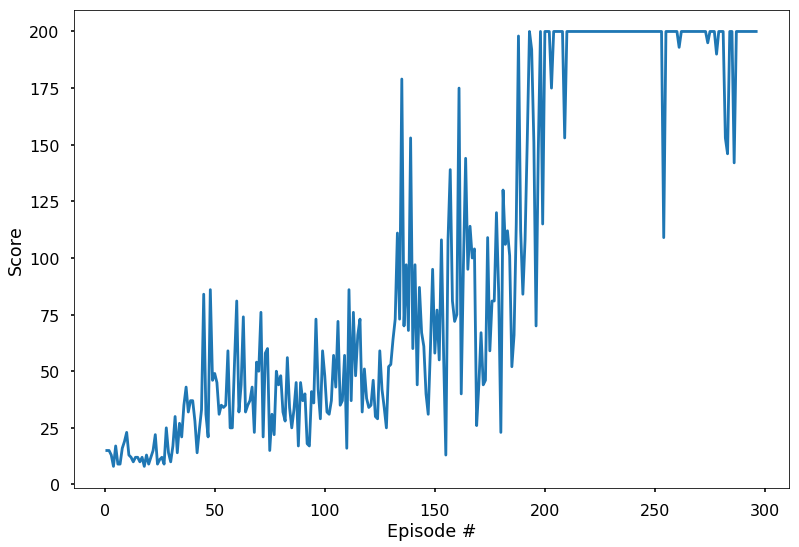

In [25]:
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

policy = Policy()

def hill_climbing(n_episodes=1000, max_t=1000, gamma=1.0, print_every=100, noise_scale=1e-2):
    '''
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        gamma (float): discount rate
        print_every (int): how often to print average score (over last 100 episodes)
        noise_scale (float): standard deviation of additive noise
    '''
    scores_deque=deque(maxlen=100)
    scores = []
    best_R = -np.Inf
    best_w = policy.w
    for ii in range(1, n_episodes+1):
        rewards = []
        state = env.reset()
        for t in range(max_t):
            action = policy.act(state)
            state, reward, done, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        scores_deque.append(sum(rewards))
        scores.append(sum(rewards))
        
        discounts = [gamma **i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])
        
        if R >= best_R:
            best_R = R
            best_w = policy.w
            noise_scale = max(1e-3, noise_scale/2)
            policy.w += noise_scale * np.random.rand(*policy.w.shape)
        else:
            noise_scale = max(2, noise_scale/2)
            policy.w = best_w + noise_scale * np.random.rand(*policy.w.shape)
        if ii % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(ii, np.mean(scores_deque)))
        if np.mean(scores_deque)>=195.0:
            print('Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ii-100, np.mean(scores_deque)))
            policy.w = best_w
            break    
            
    return scores
scores = hill_climbing()
plt.style.use('seaborn-poster')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Plot the Scores

### 5. Watch a Smart Agent!

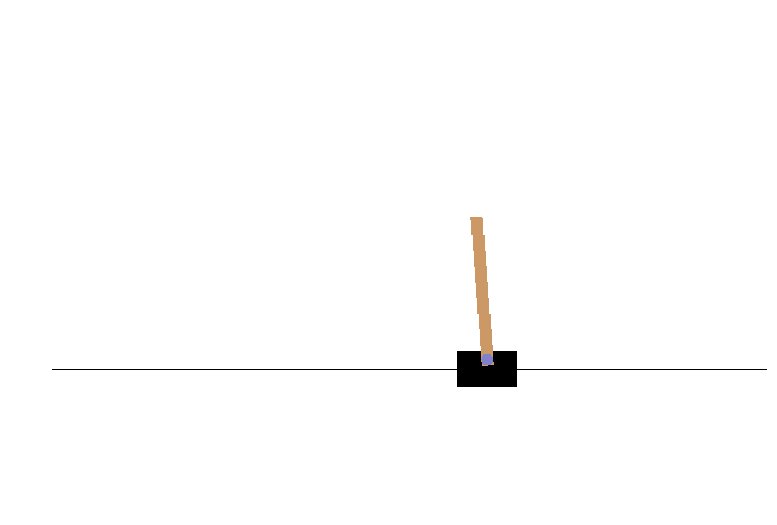

In [26]:
env = gym.make('CartPole-v0')
state = env.reset()
img = plt.imshow(env.render(mode='rgb_array'))
for t in range(1000):
    action = policy.act(state)
    img.set_data(env.render(mode='rgb_array')) 
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()